# Read the textured_50sampled data and verify the reproducibility with the original implementation
(.mat for original implementation and .npz for Ruihan's reimplementation in Python)

In [1]:
import scipy.io as sio
import numpy as np
import os.path as osp
import sys
import os

## Case 1: existing data. compare org_data and my_data

In [2]:
obj_name = "006_mustard_bottle"
data_dir  = f"/home/ruihan/Documents/16741_proj/Shape_Mapping_Tactile-main/models/{obj_name}"
org_data = sio.loadmat(osp.join(data_dir, 'textured_50sampled.mat'))
my_data = sio.loadmat(osp.join(data_dir, 'textured_60sampled_python.mat'))

In [3]:
# compare the keys
print(f"org_data: {org_data.keys()}")
print(f"my_data: {my_data.keys()}")
print(f"compare number of samples {org_data['numSamples']}  vs {my_data['numSamples']}")
org_sample_points = org_data['samplePoints']
my_sample_points = my_data['samplePoints']
print(f"compare sampled points {org_sample_points.shape} vs {my_sample_points.shape}")
org_sample_normals = org_data['sampleNormals']
my_sample_normals = my_data['sampleNormals']
print(f"compare sampled normals {org_sample_normals.shape} vs {my_sample_normals.shape}")

org_data: dict_keys(['__header__', '__version__', '__globals__', 'numSamples', 'vertices', 'normals', 'faces', 'samplePoints', 'sampleNormals', 'None', '__function_workspace__'])
my_data: dict_keys(['__header__', '__version__', '__globals__', 'model_name', 'vertices', 'normals', 'faces', 'numSamples', 'samplePoints', 'sampleNormals'])
compare number of samples [[50]]  vs [[60]]
compare sampled points (50, 3) vs (60, 3)
compare sampled normals (50, 3) vs (60, 3)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
shape_mapping_root_path: /home/ruihan/Documents/16741_proj/Shape_Mapping_Tactile-main


/tmp/ipykernel_42186/1560384292.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


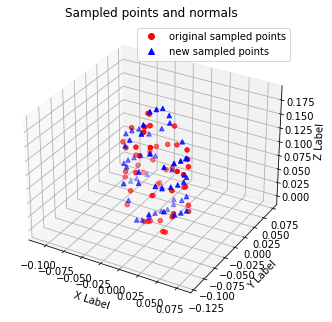

In [4]:
# Plot the original sampled points and new sampled points in the same 3D plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sampleModelPoints import set_axes_equal
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(org_sample_points[:,0], org_sample_points[:,1], org_sample_points[:,2], c='r', marker='o')
ax.scatter(my_sample_points[:,0], my_sample_points[:,1], my_sample_points[:,2], c='b', marker='^')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
set_axes_equal(ax)
# Add legend
red_patch = plt.Line2D([0], [0], linestyle="none", c='r', marker='o')
blue_patch = plt.Line2D([0], [0], linestyle="none", c='b', marker='^')
plt.legend([red_patch, blue_patch], ['original sampled points', 'new sampled points'])
plt.title('Sampled points and normals')
plt.savefig(osp.join(data_dir, 'compare_sampled_points.png'), dpi=600)
plt.show()


/tmp/ipykernel_42186/2116389764.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


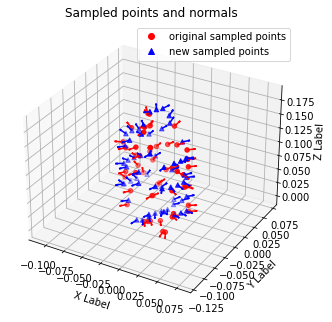

In [5]:
# Plot the original sampled points and new sampled points in the same 3D plot
# Add the sampled normals upon the 3D points
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sampleModelPoints import set_axes_equal
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(org_sample_points[:,0], org_sample_points[:,1], org_sample_points[:,2], c='r', marker='o')
# add sampled normals
ax.quiver(org_sample_points[:,0], org_sample_points[:,1], org_sample_points[:,2], org_sample_normals[:,0], org_sample_normals[:,1], org_sample_normals[:,2], length=0.01, color='r')
ax.scatter(my_sample_points[:,0], my_sample_points[:,1], my_sample_points[:,2], c='b', marker='^')
# add sampled normals
ax.quiver(my_sample_points[:,0], my_sample_points[:,1], my_sample_points[:,2], my_sample_normals[:,0], my_sample_normals[:,1], my_sample_normals[:,2], length=0.01, color='b')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
set_axes_equal(ax)
# Add legend
red_patch = plt.Line2D([0], [0], linestyle="none", c='r', marker='o')
blue_patch = plt.Line2D([0], [0], linestyle="none", c='b', marker='^')
# add legend for the normals
plt.legend([red_patch, blue_patch], ['original sampled points', 'new sampled points'])
plt.title('Sampled points and normals')
plt.savefig(osp.join(data_dir, 'compare_sampled_points_normals.png'), dpi=600)
plt.show()


## Case 2. New data. Visualize my_data

In [6]:
obj_name = "calib_ball"
data_dir  = f"/home/ruihan/Documents/16741_proj/Shape_Mapping_Tactile-main/models/{obj_name}"
my_data = sio.loadmat(osp.join(data_dir, 'textured_60sampled_python.mat'))

In [7]:
print(f"my_data: {my_data.keys()}")
my_sample_points = my_data['samplePoints']
my_sample_normals = my_data['sampleNormals']
print(f"compare my_sample_points {my_sample_points.shape}, my_sample_normals {my_sample_normals.shape}")

my_data: dict_keys(['__header__', '__version__', '__globals__', 'model_name', 'vertices', 'normals', 'faces', 'numSamples', 'samplePoints', 'sampleNormals'])
compare my_sample_points (1, 3), my_sample_normals (1, 3)


/tmp/ipykernel_42186/253834733.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


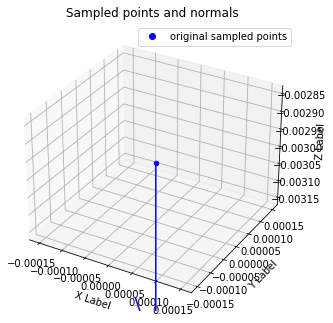

In [9]:
# Plot the sampled points and the sampled normals upon the 3D points
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sampleModelPoints import set_axes_equal
fig = plt.figure()
ax = Axes3D(fig)
# add sampled points
ax.scatter(my_sample_points[:,0], my_sample_points[:,1], my_sample_points[:,2], c='b', marker='o')
# add sampled normals
ax.quiver(my_sample_points[:,0], my_sample_points[:,1], my_sample_points[:,2], my_sample_normals[:,0], my_sample_normals[:,1], my_sample_normals[:,2], length=0.2, color='b')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
set_axes_equal(ax)
# Add legend
blue_patch = plt.Line2D([0], [0], linestyle="none", c='b', marker='o')
# add legend for the normals
plt.legend([blue_patch], ['original sampled points', 'new sampled points'])
plt.title('Sampled points and normals')
# plt.savefig(osp.join(data_dir, 'visualize_sampled_points_normals.png'), dpi=600)
plt.show()